# Setup

Clone repo, install dependencies and check PyTorch and GPU.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd '/content/gdrive/My Drive/YOLO'

/content/gdrive/My Drive/YOLO


In [2]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt  # install dependencies

import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.9.0+cu102 (Tesla P100-PCIE-16GB)


# 1. Train

Train a YOLOv5s model on Custome dataset with `--data coco128.yaml`, starting from pretrained `--weights yolov5s.pt`, or from randomly initialized `--weights '' --cfg yolov5s.yaml`. Models are downloaded automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases)

All training results are saved to `runs/train/` with incrementing run directories, i.e. `runs/train/exp2`, `runs/train/exp3` etc.


In [ ]:
# Tensorboard  (optional)
%load_ext tensorboard
%tensorboard --logdir runs/train

In [3]:
%cd '/content/gdrive/My Drive/YOLO/yolov5'

/content/gdrive/My Drive/YOLO/yolov5


In [ ]:
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 320 --batch 16 --epochs 400 --data coco128custom.yaml --weights yolov5s.pt --cache --adam 

train: weights=yolov5s.pt, cfg=, data=coco128custom.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=400, batch_size=16, img_size=[320], rect=False, resume=False, nosave=False, notest=False, noautoanchor=False, evolve=None, bucket=, cache_images=True, image_weights=False, device=, multi_scale=False, single_cls=False, adam=True, sync_bn=False, workers=8, project=runs/train, entity=None, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias=latest, local_rank=-1
github: ⚠️ WARNING: code is out of date by 2 commits. Use 'git pull' to update or 'git clone https://github.com/ultralytics/yolov5' to download latest.
YOLOv5 🚀 2021-7-12 torch 1.9.0+cu102 CUDA:0 (Tesla V100-SXM2-16GB, 16160.5MB)

hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_ga

# 2. Inference


In [4]:
!python detect.py --weights /content/gdrive/MyDrive/YOLO/yolov5/runs/train/exp6/weights/best.pt --img 320 --conf 0.5 --source /content/gdrive/MyDrive/YOLO/dataset/images/test/ --save-txt 

detect: weights=['/content/gdrive/MyDrive/YOLO/yolov5/runs/train/exp6/weights/best.pt'], source=/content/gdrive/MyDrive/YOLO/dataset/images/test/, imgsz=320, conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False
YOLOv5 🚀 2021-7-12 torch 1.9.0+cu102 CUDA:0 (Tesla P100-PCIE-16GB, 16280.875MB)

Fusing layers... 
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Model Summary

# 3. Test


In [ ]:
%cd '/content/gdrive/My Drive/YOLO/yolov5'

/content/gdrive/My Drive/YOLO/yolov5


In [5]:
# Run YOLOv5s on test
!python test.py --weights /content/gdrive/MyDrive/YOLO/yolov5/runs/train/exp6/weights/best.pt --data coco128custom.yaml --task test --img 320 --iou 0.5 --half

test: data=./data/coco128custom.yaml, weights=['/content/gdrive/MyDrive/YOLO/yolov5/runs/train/exp6/weights/best.pt'], batch_size=32, imgsz=320, conf_thres=0.001, iou_thres=0.5, task=test, device=, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/test, name=exp, exist_ok=False, half=True
YOLOv5 🚀 2021-7-12 torch 1.9.0+cu102 CUDA:0 (Tesla P100-PCIE-16GB, 16280.875MB)

Fusing layers... 
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Model Summary: 224 layers, 7059304 parameters, 0 gradients, 16.3 GFLOPs
test: Scanning '/content/gdrive/MyDrive/YOLO/dataset/la

# Traing Plot:

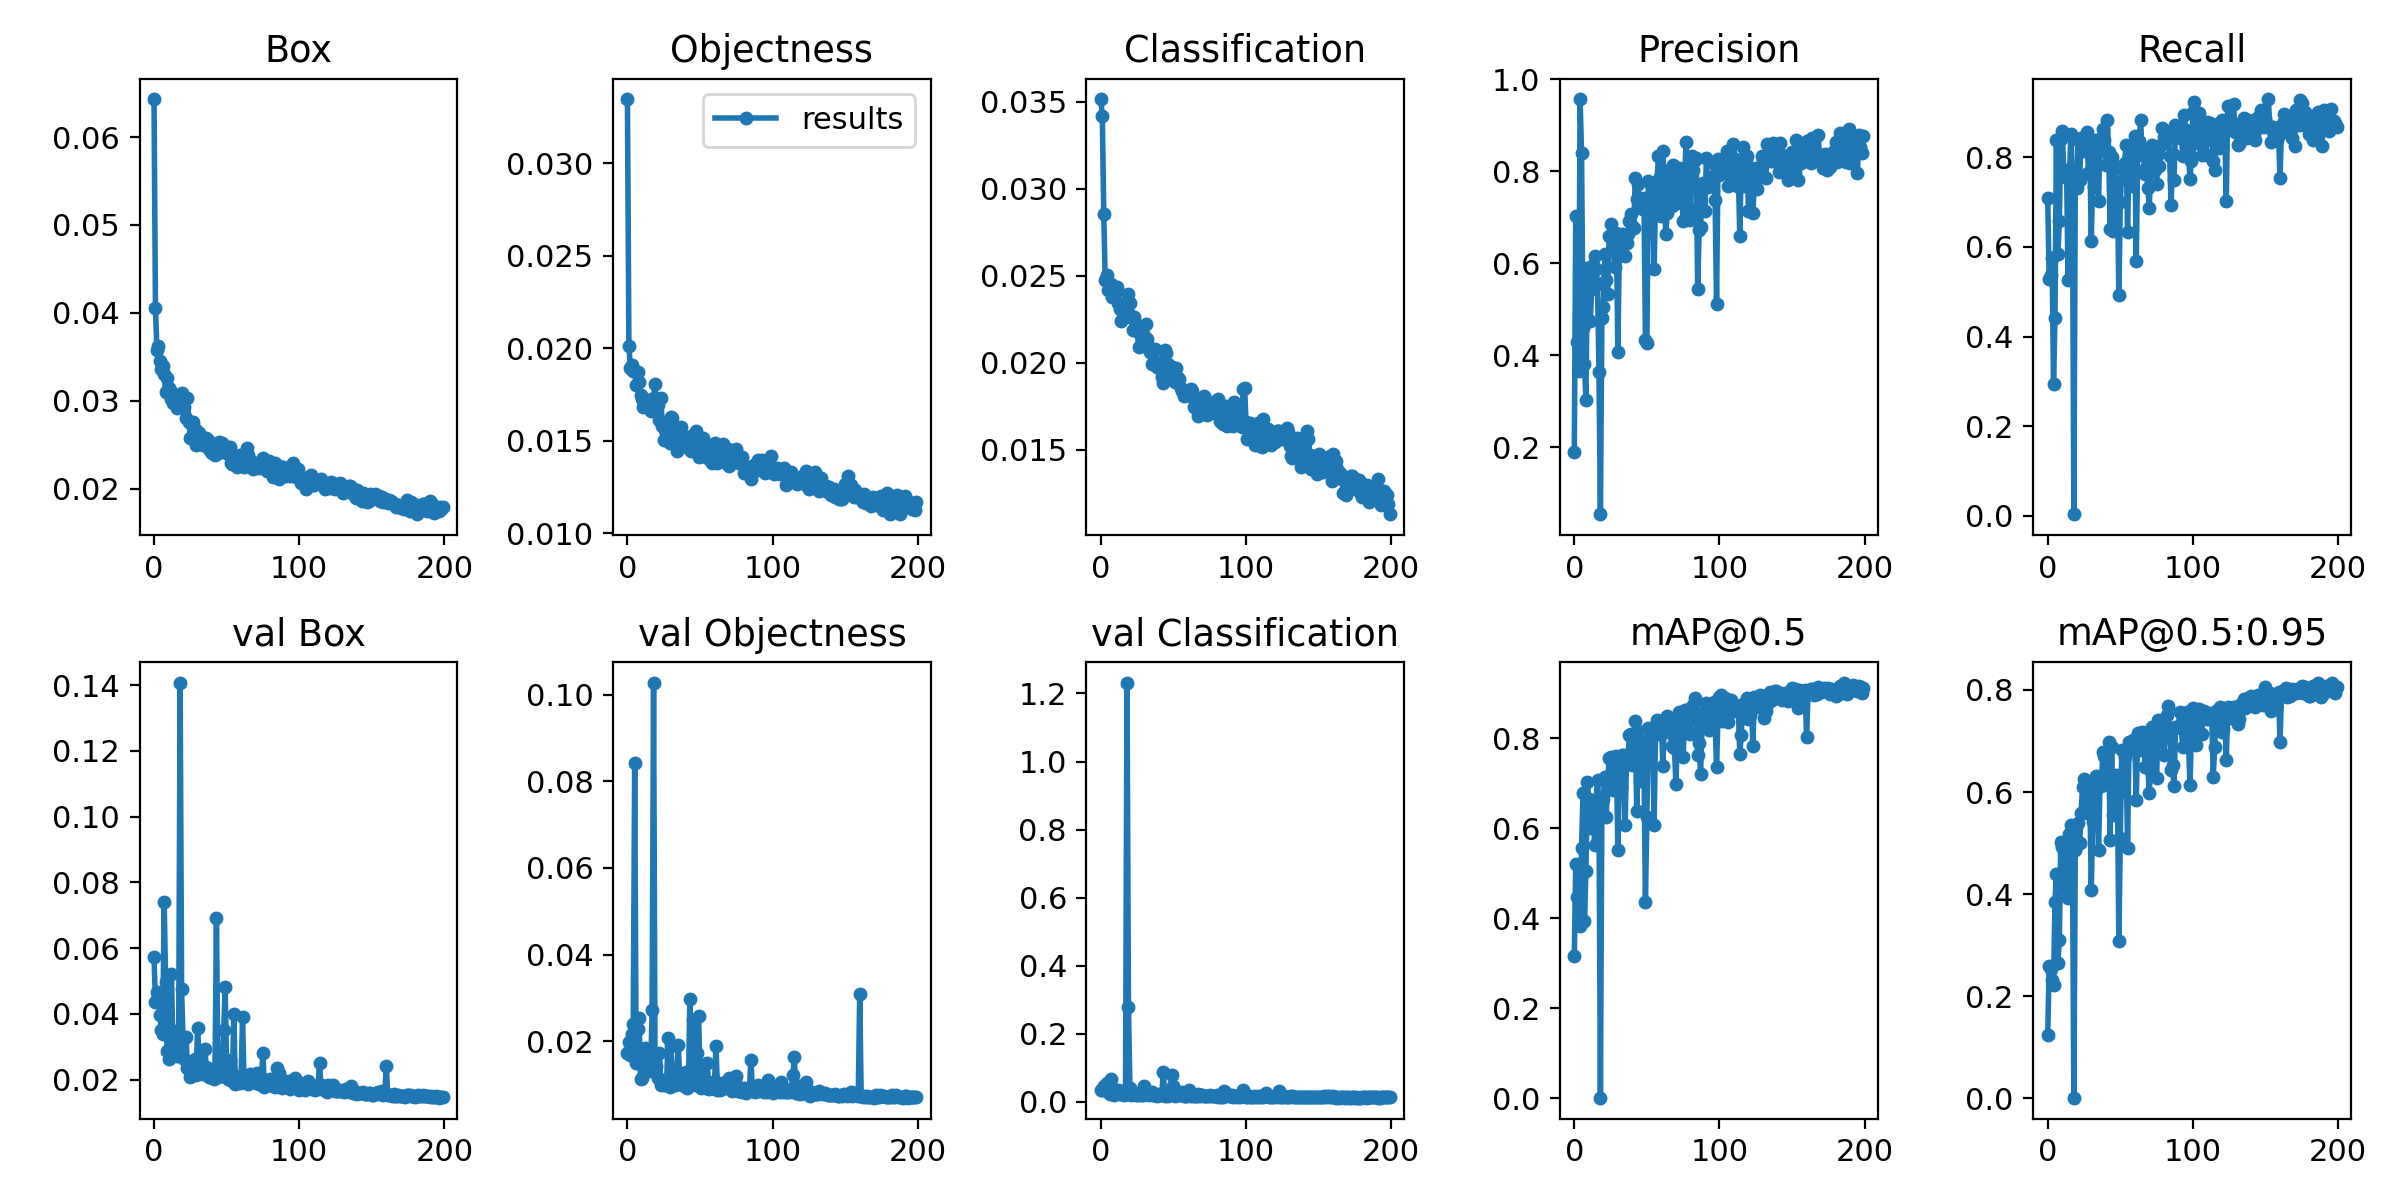

In [ ]:
from utils.plots import plot_results 
plot_results(save_dir='runs/train/exp5')  # plot all results*.txt files in 'runs/train/exp'
Image(filename='runs/train/exp5/results.png', width=800)

In [12]:
import os
import numpy as np
import pandas as pd
def YOLOtoPascalVOC(detectedPath = ''):
    label_data = []
    _, _, allfiles = next(os.walk(detectedPath))
    for det_file in allfiles:
        with open(detectedPath+det_file, 'r') as handler:
            for line in handler:
                class_id, x, y, w, h = line.split(' ')
                class_label = int(class_id)
                x = float(x)
                y = float(y)
                w = float(w)
                h = float(h)
                image_file = det_file.replace('.txt', '.jpg')
                xmin = (x - (w/2.0))
                if (xmin < 0):
                    xmin = 0
                xmax = (x + (w/2.0))
                if (xmax > 1):
                    xmax = 1
                ymin = (y - (h/2.0))
                if (ymin < 0):
                    ymin = 0
                ymax = (y + (h/2.0))
                if (ymax > 1):
                    ymax = 1
                label_data.append([image_file, class_label, xmin, ymin, xmax, ymax])
    bbox_df = pd.DataFrame(data=label_data, columns=['filename', 'detection_classes', 'xmin', 'ymin', 'xmax', 'ymax'])
    return bbox_df

In [37]:
detectedObjects = YOLOtoPascalVOC('/content/gdrive/MyDrive/YOLO/yolov5/runs/detect/exp6/labels/')

In [38]:
detectedObjects.head()

,filename,detection_classes,xmin,ymin,xmax,ymax
0,000061.jpg,1,0.143334,0.306667,0.256667,0.420000
1,000061.jpg,1,0.026667,0.330000,0.136667,0.446666
2,000061.jpg,0,0.386666,0.246666,0.499999,0.340000
3,000061.jpg,2,0.549999,0.543333,0.656667,0.643333
4,000120.jpg,0,0.230000,0.293334,0.343334,0.410000


In [6]:
%cd '/content/gdrive/My Drive/TensorFlow/workspace/training_demo'

/content/gdrive/My Drive/TensorFlow/workspace/training_demo


In [7]:
import EvaluationUtils as EvalUtils

base_dir = '/content/gdrive/My Drive/TensorFlow/workspace/training_demo/images/test/'
bbox_df, image_files_list, label_files_list = EvalUtils.retrieve_bounding_box_details(base_dir)
image_files_list_sort = sorted(image_files_list)

In [8]:
len(image_files_list_sort)

109

In [9]:
category_index = {0:'erythrocyte', 1:'punctate reticulocyte', 2:'aggregate reticulocyte'}

In [22]:
import pandas as pd
import numpy as np
import cv2 as cv
def generate_matrices(min_score_thresh=.50, 
                      check_duplicate = False, 
                      check_partial_detection = False):
    eval_output_list = []
    for image_path in image_files_list_sort:
        image_name = image_path
        image_path = base_dir+ image_path
        cur_img = cv.imread(image_path)
        detections = detectedObjects[detectedObjects.filename == image_name]

        # detection_classes should be ints.
        detections['detection_classes']=detections['detection_classes'].astype(np.int64)
        #image_np_with_detections=image_np.copy()
        det_boxs = detections[['ymin', 'xmin', 'ymax', 'xmax']].values.tolist()
        det_class = list(detections['detection_classes'])
        det_class_category = [category_index[x] for x in det_class]
        detection_num = len(det_class_category)
        if (check_duplicate == True) and (det_boxs is not None) and (len(det_boxs)>0):
            det_boxs, det_class_category = EvalUtils.detect_duplicate_boxes(det_boxs, det_class_category)
            detection_num = len(det_class_category)
        if (check_partial_detection == True) and (det_boxs is not None) and (len(det_boxs)>0):
            det_boxs, det_class_category = EvalUtils.remove_partial_detections(cur_img, det_boxs, det_class_category)
            detection_num = len(det_class_category)
        bbox_file = bbox_df[bbox_df.filename == image_name]
        actual_aggregates = len(bbox_file[bbox_file['class'] == 'aggregate reticulocyte'])
        actual_punctate = len(bbox_file[bbox_file['class'] == 'punctate reticulocyte'])
        actual_erythrocyte = len(bbox_file[bbox_file['class'] == 'erythrocyte'])
        num_Actuals = len(bbox_file)

        bb_final_selection = bbox_file[['xmin', 'ymin', 'xmax', 'ymax', 'class']]
        bb_final_selection['match_found'] = 0
        list_bbox = bb_final_selection.values.tolist()
        Aggregate = 0
        Punctate = 0
        Erythrocyte = 0
        TP_Aggregate = 0
        TP_Punctate = 0
        TP_Erythrocyte = 0
        FP_Aggregate = 0
        FP_Punctate = 0
        FP_Erythrocyte = 0
        FN_Aggregate = 0
        FN_Punctate = 0
        FN_Erythrocyte = 0
        FP_Aggregate_TP_Punctate = 0
        FP_Aggregate_TP_Erythrocyte = 0
        FP_Punctate_TP_Aggregate = 0
        FP_Punctate_TP_Erythrocyte = 0
        FP_Erythrocyte_TP_Aggregate = 0
        FP_Erythrocyte_TP_Punctate = 0
        NoMatch = 0
        for box_category in zip(det_boxs, det_class_category):
            box, category = box_category[0], box_category[1]
            IoU = 0
            bbox_index = 0
            for ind, actuals in enumerate(list_bbox):
                # Only check intersection with those boxes which are not yet matched
                # actuals[5] correspond to match_found column
                if actuals[5] == 0:
                    curIoU = EvalUtils.compute_IOU_score(actuals[:4], box)
                    if(curIoU > IoU):
                        bbox_index = ind
                        IoU = curIoU
                if category == 'aggregate reticulocyte':
                    Aggregate = Aggregate+1
                elif category == 'punctate reticulocyte':
                    Punctate = Punctate+1
                elif category == 'erythrocyte':
                    Erythrocyte = Erythrocyte+1  
                # If the dtectected category ->category
                # Actual category <-list_bbox[bbox_index][4]
                # If both are same its a True Positive Detection, Good
                if (IoU > 0):
                    #Setting indication that this box is already found a match with label having higher score
                    list_bbox[bbox_index][5] = 1
                    actual_category = list_bbox[bbox_index][4]
                    if actual_category == category:
                        if category == 'aggregate reticulocyte':
                            TP_Aggregate = TP_Aggregate+1
                        elif category == 'punctate reticulocyte':
                            TP_Punctate = TP_Punctate+1
                        elif category == 'erythrocyte':
                            TP_Erythrocyte = TP_Erythrocyte+1  
                    else:
                        # Else is for FP detections           
                        if category == 'aggregate reticulocyte' and actual_category == 'punctate reticulocyte':
                            FP_Aggregate_TP_Punctate = FP_Aggregate_TP_Punctate + 1
                        if category == 'aggregate reticulocyte' and actual_category == 'erythrocyte':
                            FP_Aggregate_TP_Erythrocyte = FP_Aggregate_TP_Erythrocyte + 1
                        if category == 'punctate reticulocyte' and actual_category == 'aggregate reticulocyte':
                            FP_Punctate_TP_Aggregate = FP_Punctate_TP_Aggregate + 1
                        if category == 'punctate reticulocyte' and actual_category == 'erythrocyte':
                            FP_Punctate_TP_Erythrocyte = FP_Punctate_TP_Erythrocyte + 1
                        elif category == 'erythrocyte' and actual_category == 'aggregate reticulocyte':
                            FP_Erythrocyte_TP_Aggregate = FP_Erythrocyte_TP_Aggregate + 1
                        elif category == 'erythrocyte' and actual_category == 'punctate reticulocyte':
                            FP_Erythrocyte_TP_Punctate = FP_Erythrocyte_TP_Punctate + 1  
                else:
                    # These are extra detections - False Positives
                    if category == 'aggregate reticulocyte':
                        FP_Aggregate = FP_Aggregate+1
                    elif category == 'punctate reticulocyte':
                        FP_Punctate = FP_Punctate+1
                    elif category == 'erythrocyte':
                        FP_Erythrocyte = FP_Erythrocyte+1
        #if num_Actuals >  detection_num:
        for i in range(len(list_bbox)):
            if list_bbox[i][5] == 0:
                if list_bbox[i][4] == 'aggregate reticulocyte':
                    FN_Aggregate = FN_Aggregate+1
                elif list_bbox[i][4] == 'punctate reticulocyte':
                    FN_Punctate = FN_Punctate+1
                elif list_bbox[i][4] == 'erythrocyte':
                    FN_Erythrocyte = FN_Erythrocyte+1                   

        imagewise_data = [image_name, TP_Aggregate, TP_Punctate, TP_Erythrocyte, 
                        FP_Aggregate, FP_Punctate, FP_Erythrocyte, 
                        FP_Aggregate_TP_Punctate, FP_Aggregate_TP_Erythrocyte,
                        FP_Punctate_TP_Aggregate, FP_Punctate_TP_Erythrocyte,
                        FP_Erythrocyte_TP_Aggregate, FP_Erythrocyte_TP_Punctate,
                        FN_Aggregate, FN_Punctate, FN_Erythrocyte,
                        Aggregate, Punctate, Erythrocyte, 
                        actual_aggregates, actual_punctate, actual_erythrocyte, 
                        num_Actuals, detection_num]
        column_names = ['image_name', 'TP_Aggregate', 'TP_Punctate', 'TP_Erythrocyte', 
                      'FP_Aggregate', 'FP_Punctate', 'FP_Erythrocyte',
                      'FP_Aggregate_TP_Punctate', 'FP_Aggregate_TP_Erythrocyte',
                      'FP_Punctate_TP_Aggregate', 'FP_Punctate_TP_Erythrocyte',
                      'FP_Erythrocyte_TP_Aggregate', 'FP_Erythrocyte_TP_Punctate',
                      'FN_Aggregate', 'FN_Punctate', 'FN_Erythrocyte', 
                      'Aggregate', 'Punctate', 'Erythrocyte', 
                      'Actual_aggregates', 'Actual_punctates','Actual_erythrocytes','Actual', 'Detected']
        eval_output_list.append(imagewise_data)
    prediction_data = pd.DataFrame(data =eval_output_list, columns = column_names)
    return prediction_data

In [44]:
prediction_data = generate_matrices(0.40, True, True)
confusion_matrix, confusion_df = EvalUtils.create_confusion_matrix(prediction_data)
Accuracy, Accuracy_aggregate, Accuracy_punctate, Accuracy_erythrocyte = EvalUtils.compute_accuracy(confusion_matrix)
confusion_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Aggregate,Punctate,Erythrocyte,FP,FN
0,99,4,0,1,0
1,0,77,19,1,0
2,1,7,183,6,6


In [45]:
Accuracy

0.8886138613861386

In [13]:
detectedObjects = YOLOtoPascalVOC('/content/gdrive/MyDrive/YOLO/yolov5/runs/detect/exp6/labels/')

In [14]:
prediction_data = generate_matrices(0.50, True, True)
confusion_matrix, confusion_df = EvalUtils.create_confusion_matrix(prediction_data)
Accuracy, Accuracy_aggregate, Accuracy_punctate, Accuracy_erythrocyte = EvalUtils.compute_accuracy(confusion_matrix)
print("Accuracy: ", Accuracy)
confusion_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy:  0.8886138613861386


,Aggregate,Punctate,Erythrocyte,FP,FN
0,99,4,0,1,0
1,0,77,19,1,0
2,1,7,183,6,6


#### Score 0.4

In [17]:
import sys
sys.path.append("/content/gdrive/My Drive/YOLO/yolov5")
sys.path.append("/content/gdrive/My Drive/TensorFlow/workspace/training_demo")

In [19]:
%cd "/content/gdrive/My Drive/YOLO/yolov5"
!python detect.py --weights /content/gdrive/MyDrive/YOLO/yolov5/runs/train/exp6/weights/best.pt --img 320 --conf 0.4 --source /content/gdrive/MyDrive/YOLO/dataset/images/test/ --save-txt 

/content/gdrive/My Drive/YOLO/yolov5
detect: weights=['/content/gdrive/MyDrive/YOLO/yolov5/runs/train/exp6/weights/best.pt'], source=/content/gdrive/MyDrive/YOLO/dataset/images/test/, imgsz=320, conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False
YOLOv5 🚀 2021-7-12 torch 1.9.0+cu102 CUDA:0 (Tesla P100-PCIE-16GB, 16280.875MB)

Fusing layers... 
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, paddin

In [20]:
%cd "/content/gdrive/My Drive/TensorFlow/workspace/training_demo"
detectedObjects = YOLOtoPascalVOC('/content/gdrive/MyDrive/YOLO/yolov5/runs/detect/exp8/labels/')
prediction_data = generate_matrices(0.40, True, True)
confusion_matrix, confusion_df = EvalUtils.create_confusion_matrix(prediction_data)
Accuracy, Accuracy_aggregate, Accuracy_punctate, Accuracy_erythrocyte = EvalUtils.compute_accuracy(confusion_matrix)
print("Accuracy: ", Accuracy)
confusion_df

/content/gdrive/My Drive/TensorFlow/workspace/training_demo


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy:  0.85995085995086


,Aggregate,Punctate,Erythrocyte,FP,FN
0,96,5,1,2,0
1,3,73,21,2,0
2,1,10,181,7,5


In [23]:
prediction_data = generate_matrices(0.40, False, False)
confusion_matrix, confusion_df = EvalUtils.create_confusion_matrix(prediction_data)
Accuracy, Accuracy_aggregate, Accuracy_punctate, Accuracy_erythrocyte = EvalUtils.compute_accuracy(confusion_matrix)
print("Accuracy: ", Accuracy)
confusion_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy:  0.7489177489177489


,Aggregate,Punctate,Erythrocyte,FP,FN
0,93,6,1,7,0
1,5,71,22,16,0
2,2,11,182,43,3


In [24]:
%cd "/content/gdrive/My Drive/YOLO/yolov5"
!python detect.py --weights /content/gdrive/MyDrive/YOLO/yolov5/runs/train/exp6/weights/best.pt --img 320 --conf 0.45 --source /content/gdrive/MyDrive/YOLO/dataset/images/test/ --save-txt 

/content/gdrive/My Drive/YOLO/yolov5
detect: weights=['/content/gdrive/MyDrive/YOLO/yolov5/runs/train/exp6/weights/best.pt'], source=/content/gdrive/MyDrive/YOLO/dataset/images/test/, imgsz=320, conf_thres=0.45, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False
YOLOv5 🚀 2021-7-12 torch 1.9.0+cu102 CUDA:0 (Tesla P100-PCIE-16GB, 16280.875MB)

Fusing layers... 
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, paddi

In [27]:
%cd "/content/gdrive/My Drive/TensorFlow/workspace/training_demo"
detectedObjects = YOLOtoPascalVOC('/content/gdrive/MyDrive/YOLO/yolov5/runs/detect/exp9/labels/')
prediction_data = generate_matrices(0.45, True, True)
confusion_matrix, confusion_df = EvalUtils.create_confusion_matrix(prediction_data)
Accuracy, Accuracy_aggregate, Accuracy_punctate, Accuracy_erythrocyte = EvalUtils.compute_accuracy(confusion_matrix)
print("Accuracy: ", Accuracy)
confusion_df

/content/gdrive/My Drive/TensorFlow/workspace/training_demo


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy:  0.8814814814814815


,Aggregate,Punctate,Erythrocyte,FP,FN
0,98,4,0,1,0
1,1,77,21,2,0
2,1,7,182,6,5


In [28]:
%cd "/content/gdrive/My Drive/TensorFlow/workspace/training_demo"
detectedObjects = YOLOtoPascalVOC('/content/gdrive/MyDrive/YOLO/yolov5/runs/detect/exp9/labels/')
prediction_data = generate_matrices(0.45, False, False)
confusion_matrix, confusion_df = EvalUtils.create_confusion_matrix(prediction_data)
Accuracy, Accuracy_aggregate, Accuracy_punctate, Accuracy_erythrocyte = EvalUtils.compute_accuracy(confusion_matrix)
print("Accuracy: ", Accuracy)
confusion_df

/content/gdrive/My Drive/TensorFlow/workspace/training_demo


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy:  0.7819383259911894


,Aggregate,Punctate,Erythrocyte,FP,FN
0,96,5,0,4,0
1,2,75,21,14,0
2,2,8,184,40,3


In [29]:
%cd "/content/gdrive/My Drive/YOLO/yolov5"
!python detect.py --weights /content/gdrive/MyDrive/YOLO/yolov5/runs/train/exp6/weights/best.pt --img 320 --conf 0.55 --source /content/gdrive/MyDrive/YOLO/dataset/images/test/ --save-txt 

/content/gdrive/My Drive/YOLO/yolov5
detect: weights=['/content/gdrive/MyDrive/YOLO/yolov5/runs/train/exp6/weights/best.pt'], source=/content/gdrive/MyDrive/YOLO/dataset/images/test/, imgsz=320, conf_thres=0.55, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False
YOLOv5 🚀 2021-7-12 torch 1.9.0+cu102 CUDA:0 (Tesla P100-PCIE-16GB, 16280.875MB)

Fusing layers... 
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, paddi

In [30]:
%cd "/content/gdrive/My Drive/TensorFlow/workspace/training_demo"
detectedObjects = YOLOtoPascalVOC('/content/gdrive/MyDrive/YOLO/yolov5/runs/detect/exp10/labels/')
prediction_data = generate_matrices(0.55, True, True)
confusion_matrix, confusion_df = EvalUtils.create_confusion_matrix(prediction_data)
Accuracy, Accuracy_aggregate, Accuracy_punctate, Accuracy_erythrocyte = EvalUtils.compute_accuracy(confusion_matrix)
print("Accuracy: ", Accuracy)
confusion_df

/content/gdrive/My Drive/TensorFlow/workspace/training_demo


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy:  0.8910891089108911


,Aggregate,Punctate,Erythrocyte,FP,FN
0,99,3,0,1,0
1,0,78,18,1,0
2,1,7,183,6,7


In [44]:
prediction_data = generate_matrices(0.55, False, False)
confusion_matrix, confusion_df = EvalUtils.create_confusion_matrix(prediction_data)
Accuracy, Accuracy_aggregate, Accuracy_punctate, Accuracy_erythrocyte = EvalUtils.compute_accuracy(confusion_matrix)
print("Accuracy: ", Accuracy)
confusion_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy:  0.8361858190709046


,Aggregate,Punctate,Erythrocyte,FP,FN
0,95,1,0,2,3
1,0,69,11,3,15
2,2,3,178,8,19


In [32]:
%cd "/content/gdrive/My Drive/YOLO/yolov5"
!python detect.py --weights /content/gdrive/MyDrive/YOLO/yolov5/runs/train/exp6/weights/best.pt --img 320 --conf 0.60 --source /content/gdrive/MyDrive/YOLO/dataset/images/test/ --save-txt 

/content/gdrive/My Drive/YOLO/yolov5
detect: weights=['/content/gdrive/MyDrive/YOLO/yolov5/runs/train/exp6/weights/best.pt'], source=/content/gdrive/MyDrive/YOLO/dataset/images/test/, imgsz=320, conf_thres=0.6, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False
YOLOv5 🚀 2021-7-12 torch 1.9.0+cu102 CUDA:0 (Tesla P100-PCIE-16GB, 16280.875MB)

Fusing layers... 
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, paddin

In [33]:
%cd "/content/gdrive/My Drive/TensorFlow/workspace/training_demo"
detectedObjects = YOLOtoPascalVOC('/content/gdrive/MyDrive/YOLO/yolov5/runs/detect/exp11/labels/')
prediction_data = generate_matrices(0.60, True, True)
confusion_matrix, confusion_df = EvalUtils.create_confusion_matrix(prediction_data)
Accuracy, Accuracy_aggregate, Accuracy_punctate, Accuracy_erythrocyte = EvalUtils.compute_accuracy(confusion_matrix)
print("Accuracy: ", Accuracy)
confusion_df

/content/gdrive/My Drive/TensorFlow/workspace/training_demo


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy:  0.8933002481389578


,Aggregate,Punctate,Erythrocyte,FP,FN
0,99,1,0,1,0
1,0,78,13,1,4
2,1,5,183,5,12


In [34]:
prediction_data = generate_matrices(0.60, False, False)
confusion_matrix, confusion_df = EvalUtils.create_confusion_matrix(prediction_data)
Accuracy, Accuracy_aggregate, Accuracy_punctate, Accuracy_erythrocyte = EvalUtils.compute_accuracy(confusion_matrix)
print("Accuracy: ", Accuracy)
confusion_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy:  0.8571428571428571


,Aggregate,Punctate,Erythrocyte,FP,FN
0,98,1,0,2,0
1,0,78,13,4,4
2,2,5,184,18,11


In [35]:
%cd "/content/gdrive/My Drive/YOLO/yolov5"
!python detect.py --weights /content/gdrive/MyDrive/YOLO/yolov5/runs/train/exp6/weights/best.pt --img 320 --conf 0.65 --source /content/gdrive/MyDrive/YOLO/dataset/images/test/ --save-txt 

/content/gdrive/My Drive/YOLO/yolov5
detect: weights=['/content/gdrive/MyDrive/YOLO/yolov5/runs/train/exp6/weights/best.pt'], source=/content/gdrive/MyDrive/YOLO/dataset/images/test/, imgsz=320, conf_thres=0.65, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False
YOLOv5 🚀 2021-7-12 torch 1.9.0+cu102 CUDA:0 (Tesla P100-PCIE-16GB, 16280.875MB)

Fusing layers... 
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, paddi

In [36]:
%cd "/content/gdrive/My Drive/TensorFlow/workspace/training_demo"
detectedObjects = YOLOtoPascalVOC('/content/gdrive/MyDrive/YOLO/yolov5/runs/detect/exp12/labels/')
prediction_data = generate_matrices(0.65, True, True)
confusion_matrix, confusion_df = EvalUtils.create_confusion_matrix(prediction_data)
Accuracy, Accuracy_aggregate, Accuracy_punctate, Accuracy_erythrocyte = EvalUtils.compute_accuracy(confusion_matrix)
print("Accuracy: ", Accuracy)
confusion_df

/content/gdrive/My Drive/TensorFlow/workspace/training_demo


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy:  0.8808933002481389


,Aggregate,Punctate,Erythrocyte,FP,FN
0,98,1,0,1,1
1,0,76,12,1,7
2,1,4,181,5,15


In [37]:
prediction_data = generate_matrices(0.65, False, False)
confusion_matrix, confusion_df = EvalUtils.create_confusion_matrix(prediction_data)
Accuracy, Accuracy_aggregate, Accuracy_punctate, Accuracy_erythrocyte = EvalUtils.compute_accuracy(confusion_matrix)
print("Accuracy: ", Accuracy)
confusion_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy:  0.8492822966507177


,Aggregate,Punctate,Erythrocyte,FP,FN
0,97,1,0,2,1
1,0,76,12,4,7
2,2,4,182,16,14


In [38]:
%cd "/content/gdrive/My Drive/YOLO/yolov5"
!python detect.py --weights /content/gdrive/MyDrive/YOLO/yolov5/runs/train/exp6/weights/best.pt --img 320 --conf 0.70 --source /content/gdrive/MyDrive/YOLO/dataset/images/test/ --save-txt 

/content/gdrive/My Drive/YOLO/yolov5
detect: weights=['/content/gdrive/MyDrive/YOLO/yolov5/runs/train/exp6/weights/best.pt'], source=/content/gdrive/MyDrive/YOLO/dataset/images/test/, imgsz=320, conf_thres=0.7, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False
YOLOv5 🚀 2021-7-12 torch 1.9.0+cu102 CUDA:0 (Tesla P100-PCIE-16GB, 16280.875MB)

Fusing layers... 
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, paddin

In [39]:
%cd "/content/gdrive/My Drive/TensorFlow/workspace/training_demo"
detectedObjects = YOLOtoPascalVOC('/content/gdrive/MyDrive/YOLO/yolov5/runs/detect/exp13/labels/')
prediction_data = generate_matrices(0.70, True, True)
confusion_matrix, confusion_df = EvalUtils.create_confusion_matrix(prediction_data)
Accuracy, Accuracy_aggregate, Accuracy_punctate, Accuracy_erythrocyte = EvalUtils.compute_accuracy(confusion_matrix)
print("Accuracy: ", Accuracy)
confusion_df

/content/gdrive/My Drive/TensorFlow/workspace/training_demo


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy:  0.8756218905472637


,Aggregate,Punctate,Erythrocyte,FP,FN
0,98,1,0,1,1
1,0,75,12,1,8
2,1,4,179,4,17


In [40]:
prediction_data = generate_matrices(0.70, False, False)
confusion_matrix, confusion_df = EvalUtils.create_confusion_matrix(prediction_data)
Accuracy, Accuracy_aggregate, Accuracy_punctate, Accuracy_erythrocyte = EvalUtils.compute_accuracy(confusion_matrix)
print("Accuracy: ", Accuracy)
confusion_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy:  0.8523002421307506


,Aggregate,Punctate,Erythrocyte,FP,FN
0,97,1,0,2,1
1,0,75,12,3,8
2,2,4,180,12,16


In [41]:
%cd "/content/gdrive/My Drive/YOLO/yolov5"
!python detect.py --weights /content/gdrive/MyDrive/YOLO/yolov5/runs/train/exp6/weights/best.pt --img 320 --conf 0.75 --source /content/gdrive/MyDrive/YOLO/dataset/images/test/ --save-txt 

/content/gdrive/My Drive/YOLO/yolov5
detect: weights=['/content/gdrive/MyDrive/YOLO/yolov5/runs/train/exp6/weights/best.pt'], source=/content/gdrive/MyDrive/YOLO/dataset/images/test/, imgsz=320, conf_thres=0.75, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False
YOLOv5 🚀 2021-7-12 torch 1.9.0+cu102 CUDA:0 (Tesla P100-PCIE-16GB, 16280.875MB)

Fusing layers... 
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, paddi

In [42]:
%cd "/content/gdrive/My Drive/TensorFlow/workspace/training_demo"
detectedObjects = YOLOtoPascalVOC('/content/gdrive/MyDrive/YOLO/yolov5/runs/detect/exp14/labels/')
prediction_data = generate_matrices(0.75, True, True)
confusion_matrix, confusion_df = EvalUtils.create_confusion_matrix(prediction_data)
Accuracy, Accuracy_aggregate, Accuracy_punctate, Accuracy_erythrocyte = EvalUtils.compute_accuracy(confusion_matrix)
print("Accuracy: ", Accuracy)
confusion_df

/content/gdrive/My Drive/TensorFlow/workspace/training_demo


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy:  0.8528678304239401


,Aggregate,Punctate,Erythrocyte,FP,FN
0,96,1,0,1,3
1,0,69,11,1,15
2,1,3,177,3,20


In [43]:
prediction_data = generate_matrices(0.75, False, False)
confusion_matrix, confusion_df = EvalUtils.create_confusion_matrix(prediction_data)
Accuracy, Accuracy_aggregate, Accuracy_punctate, Accuracy_erythrocyte = EvalUtils.compute_accuracy(confusion_matrix)
print("Accuracy: ", Accuracy)
confusion_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy:  0.8361858190709046


,Aggregate,Punctate,Erythrocyte,FP,FN
0,95,1,0,2,3
1,0,69,11,3,15
2,2,3,178,8,19
